# EDA


In [ ]:
'''
  Author-Ashutosh 2K20/CO/107
  WORLD CUP 2022 PREDICTION AND SIMULATION USING MACHINE LEARNING
'''
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Link to the dataset ->https://drive.google.com/file/d/1gaWs5lDhMRhJxb-LfriBr8GakTyF2_lu/view?usp=sharing
# importing dataset.

df=pd.read_csv('/content/drive/MyDrive/football_international_matches.csv');
df.tail(5)


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
#getting columns in the dataset
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
# converting 'date' column to datetime
df['date']=pd.to_datetime(df['date']);

***Getting Top Ranked FIFA TEAMS***




In [ ]:
#fifa_rank is a new dataframe which contains rank related information of matches.
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]

In [ ]:
# ft contains data about only home team.
ft=fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']];
# home contains data about home team (ft's cols are renamed to generate home);
home=ft.rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })

In [ ]:
#carrying out the same procedure for away team.
ft= fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']]
away=ft.rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })

In [ ]:
# rearranging fifa_rank(appending away to home)
fifa_rank=home.append(away);

In [ ]:
#since most of the fifa points are absent in past and teams performance depends most on current form.
#we will get the latest matches for each country
fifa_rank.sort_values(['date','team'],ascending=[False,True],inplace=True);
#labels each group item from 1 to len(group)
fifa_rank['index_no']=fifa_rank.groupby('team').cumcount()+1;

'''
top_fifa_rank:
select all those rows where index_no for team is 1.
then remove index_no as we dont need it.
afterwards get top ranked team using sorting or nsmallest.
'''

top_fifa_rank=fifa_rank[fifa_rank['index_no']==1].drop('index_no',axis=1).nsmallest(10,'rank');
top_fifa_rank

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


***Top Attackers***

In [ ]:
# reshaping dataframe adding home and away just like previous
attack = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = attack [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = attack [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
attack = home.append(away)

attack   = attack .sort_values(['team', 'date'], ascending=[True, False])
attack ['row_number'] = attack .groupby('team').cumcount()+1
top_attack =attack[attack ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
top_attack

,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


***Best 10 Midfield***

In [ ]:
#preparing data just like before.
midfield= df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away);


midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = midfield .groupby('team').cumcount()+1
best_midfield = midfield [midfield['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
best_midfield


,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


***Best 10 Defense***

In [ ]:
defense= df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)


defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
best_defense = defense [defense['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
best_defense

,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


Overall Score and Score diff


In [ ]:
df['home_overall_score']=(df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_overall_score']=(df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3
df['overall_diff_score']= df['home_overall_score'] - df['away_overall_score'];

In [ ]:
overall_score=df[['date', 'home_team', 'away_team', 'home_overall_score', 'away_overall_score']];
home_team_overall_score = overall_score [['date', 'home_team','home_overall_score']].rename(columns = {'home_team': 'team', 'home_overall_score' : 'total_score'})
away_team_overall_score = overall_score [['date', 'away_team','away_overall_score']].rename(columns = {'away_team': 'team', 'away_overall_score' : 'total_score'})
overall_score  = home_team_overall_score.append(away_team_overall_score)


In [ ]:
overall_score= overall_score.sort_values(['team', 'date'], ascending=[True, False])
overall_score ['index_no'] = overall_score.groupby('team').cumcount()+1
total_score_top_10 = overall_score [overall_score['index_no']==1].drop('index_no',axis=1).nlargest(10, 'total_score')
total_score_top_10

,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
23760,2022-06-06,Brazil,85.533333
23867,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
23907,2022-06-14,Italy,84.666667
23909,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


# Part-2 :Model

In [ ]:
#Adding relevant features
df=df[(df['home_team_total_fifa_points']!=np.NaN) & (df['away_team_total_fifa_points']!=np.NaN)];
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 # considering draw as lost.

df['is_stake'] = (df['tournament'] != 'Friendly');
# df['tournament']

In [ ]:
# df.loc[:,['average_rank','rank_difference','point_difference']]
# we chose only above three as determining factors
new_df=df.loc[:,['date','average_rank','rank_difference','point_difference','is_stake','is_won']];
#train and test data split
x_train=new_df[new_df['date']<'2021-01-01'].loc[:,['average_rank','rank_difference','point_difference','is_stake']]
x_test=new_df[new_df['date']>='2021-01-01'].loc[:,['average_rank','rank_difference','point_difference','is_stake']]
y_train=new_df[new_df['date']<'2021-01-01']['is_won']
y_test=new_df[new_df['date']>='2021-01-01']['is_won']


In [ ]:
# logistic regression.
logisreg = linear_model.LogisticRegression();

model = logisreg.fit(x_train, y_train)


accuracy of the model is :0.7117718446601942


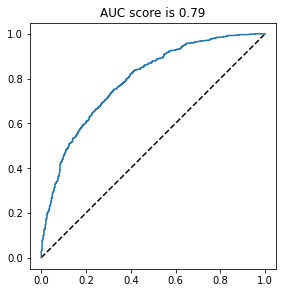

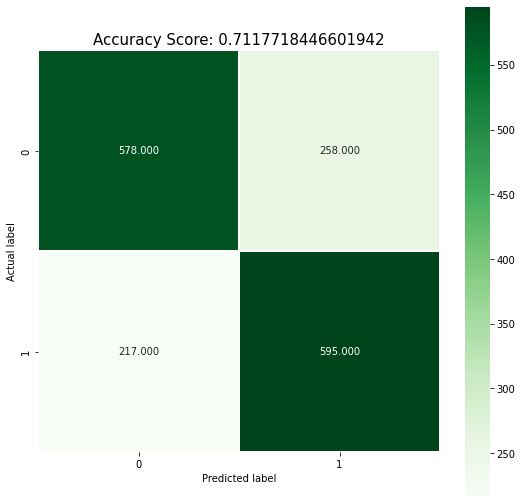

In [ ]:
#Performances and Figures

#accuracy of the model
print(f"accuracy of the model is :{model.score(x_test,y_test)}");


predictions=logisreg.predict(x_test)

cm=metrics.confusion_matrix(y_test,predictions);

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
ax.set_aspect(1)




plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {model.score(x_test,y_test)}'
plt.title(all_sample_title, size = 15);

# Simulation Using model


In [ ]:
#Participating Teams in World Cup
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [ ]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Get last 2 years of information
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])
# world_cup_rankings_home

In [ ]:
#performance may differ - so we divide them by home and away.

world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

# world_cup_rankings_home.head(10)
# world_cup_rankings_away.head(10)

In [ ]:
#most likely knockout teams.

ro16_teams=['Netherlands','Senegal','England','USA','Argentina','Poland','France','Australia',
          'Spain','Germany','Morocco','Croatia','Brazil','Switzerland','Portugal','Korea Republic']

In [ ]:
from tqdm import tqdm;
# ans=None;
def find_winner(home,away):
          # global ans;
          row = pd.DataFrame(np.array([[np.nan, np.nan,np.nan,True]]), columns=x_test.columns)
          home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
          home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
          opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
          opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
          row['average_rank'] = (home_rank + opp_rank) / 2
          row['rank_difference'] = home_rank - opp_rank
          row['point_difference'] = home_points - opp_points
          row['is_stake']=True
          # ans=row
          home_win_prob = model.predict_proba(row)[:,1][0]
          
          # simulation step based on the probability
          simulated_outcome = np.random.binomial(1, home_win_prob)
          #1 for away win 0 for home win.
          return 1 if simulated_outcome<= 0.5 else 0;

simulation_winners=dict();
for j in tqdm(range(500)):
  count=4;
  quaterfinal=[];
  semifinal=[];
  final=[];
  winner=[];
  while(count>0):
      i=0;
      
      while(i<2**count):
        if(count==4):
          #match 1: i with i+3
          home_team_1=ro16_teams[i];
          away_team_1=ro16_teams[i+3]
          if(find_winner(home_team_1,away_team_1)==1):
            quaterfinal.append(away_team_1);
          else:
            quaterfinal.append(home_team_1);
          #match 2: i+1 with i+2
          home_team_2=ro16_teams[i+1];
          away_team_2=ro16_teams[i+2];
          if(find_winner(home_team_2,away_team_2)==1):
            quaterfinal.append(away_team_2);
          else:
            quaterfinal.append(home_team_2);

        
        elif(count==3):
          #match 1->ith team with i+2
          home_team_1=quaterfinal[i]
          away_team_1=quaterfinal[i+2];
          if(find_winner(home_team_1,away_team_1)==1):
            semifinal.append(away_team_1);
          else:
            semifinal.append(home_team_1);
          #match 2->i+1th team with i+3;
          home_team_2=quaterfinal[i+1]
          away_team_2=quaterfinal[i+3]
          if(find_winner(home_team_2,away_team_2)==1):
            semifinal.append(away_team_2);
          else:
            semifinal.append(home_team_2);
          
        elif(count==2):
          #match 1-> ith team with i+2th team
          #match 2-> i+1 th team with i+3th team
          home_team_1=semifinal[i]
          away_team_1=semifinal[i+2];
          if(find_winner(home_team_1,away_team_1)==1):
            final.append(away_team_1);
          else:
            final.append(home_team_1);
          #match 2->i+1th team with i+3;
          home_team_2=semifinal[i+1]
          away_team_2=semifinal[i+3]
          if(find_winner(home_team_2,away_team_2)==1):
            final.append(away_team_2);
          else:
            final.append(home_team_2);
        elif(count==1):
          #final match
          home_team_1=final[i]
          away_team_1=final[i+1];
          if(find_winner(home_team_1,away_team_1)==1):
            winner.append(away_team_1);
            simulation_winners[away_team_1]=simulation_winners.get(away_team_1,0)+1;
          else:
            winner.append(home_team_1);
            simulation_winners[home_team_1]=simulation_winners.get(home_team_1,0)+1;
        i+=4
      
      count-=1


100%|██████████| 500/500 [00:13<00:00, 37.68it/s]


<built-in function sum>


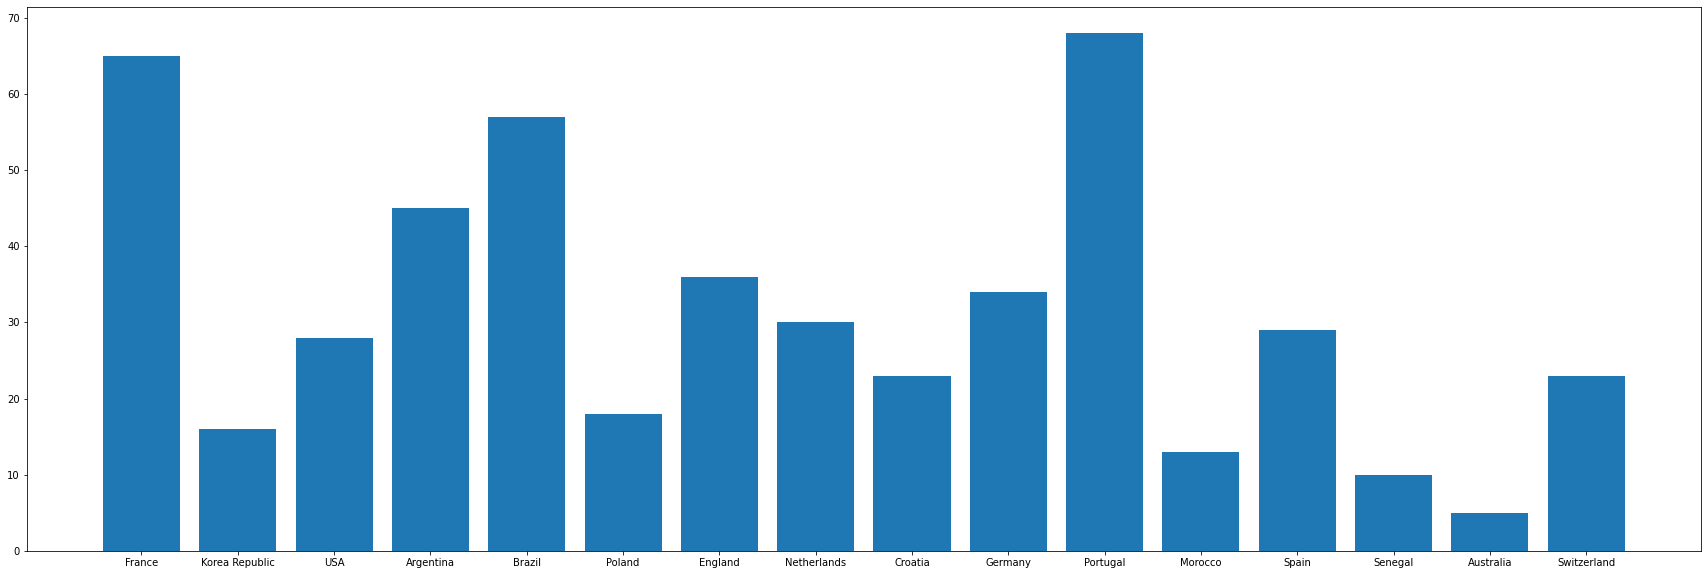

In [ ]:
#plot histogram for the teams who reach final /win final most
plt.figure(figsize=(30,10))

plt.bar(simulation_winners.keys(),simulation_winners.values());
# print(ans)
# print(model.predict(ans))
print(sum)
plt.show();